<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch04/04_karaage_ai_book_gan_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 学習させたモデルを使って手の画像を生成

必要なライブラリのインポート

In [1]:
import numpy as np
from keras.models import load_model
from PIL import Image

Google Driveと連携してモデルをGoogle Colab上にコピー

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp '/content/drive/My Drive/gan_model.h5' ./

モデルを読み込みます。

In [4]:
generator_model = load_model('gan_model.h5')
generator_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              103424    
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32768)             33587200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 32768)             131072    
_________________________________________________________________
activation_6 (Activation)    (None, 32768)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 128)       0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 128)      

## ノイズから画像を生成します。

ファイル名を設定します。

In [5]:
image_filename = 'image.png'

ノイズを生成して可視化します

In [13]:
noise = np.random.uniform(size=[1, 100], low=-1.0, high=1.0)
noise

array([[-0.14311771,  0.27185278,  0.2754494 , -0.15554375, -0.43612377,
        -0.71429072, -0.39468685, -0.84364702, -0.36492431,  0.41241564,
        -0.57829209,  0.67916328,  0.31392627,  0.56547834,  0.52764287,
         0.20968633,  0.44728607, -0.31254103,  0.46072722, -0.27031409,
         0.30502998,  0.66808226,  0.61523166,  0.82001716,  0.42060981,
        -0.57340123,  0.27028108,  0.11777708,  0.60069261,  0.08515603,
         0.87385123,  0.35681785,  0.5730354 , -0.87116547, -0.58051728,
        -0.90211802,  0.3000817 , -0.44341625, -0.40598565,  0.59009979,
         0.91466497, -0.12766317, -0.4623849 , -0.65270523,  0.05896356,
        -0.84195452,  0.9308248 , -0.91099042,  0.58736789, -0.45803789,
        -0.05820331,  0.50036433,  0.66146368,  0.3422661 , -0.91049099,
         0.27274259, -0.6335593 , -0.13358149,  0.05966681, -0.90583067,
         0.49432256,  0.99022503,  0.61719563,  0.73662869,  0.95791825,
        -0.81820813, -0.66349288,  0.59629486, -0.4

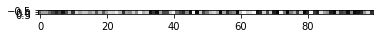

In [14]:
pil_img = Image.fromarray((noise + 1) * 127.5)
import matplotlib.pyplot as plt
plt.imshow(pil_img)

ノイズから画像を生成します。

In [15]:
generated_images = generator_model.predict(noise)

img = generated_images[0] * 127.5 + 127.5
pil_img = Image.fromarray(np.uint8(img))
pil_img.save(image_filename)

生成した画像を表示します。

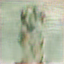

In [16]:
from IPython.display import Image as IPImage
from IPython.display import display_png
display_png(IPImage(image_filename))

画像を保存します

In [ ]:
from google.colab import files
files.download(image_filename)